# Support Vector Machine Examples

based on scikit-learn svm tutorial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math
import Datasets

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
# let's do the linear version first
mu_s = [0.45,0.45]
mu_b = [-0.45,-0.45]
sigma_s = [0.2, 0.3]
sigma_b = [0.2, 0.2]

sig = Datasets.gen_2Dgauss(mu_s,sigma_s,100)
bkg = Datasets.gen_2Dgauss(mu_b,sigma_b,100)

In [4]:
def plot_scatter(sig,bkg,xvar,yvar):
    plt.plot(sig[xvar],sig[yvar], 'o', c='tab:blue', label='sig', alpha=0.5, markeredgecolor='k')
    plt.plot(bkg[xvar],bkg[yvar], 'o', c='tab:orange', label='bkg', alpha=0.5, markeredgecolor='k')
    plt.legend()
    return

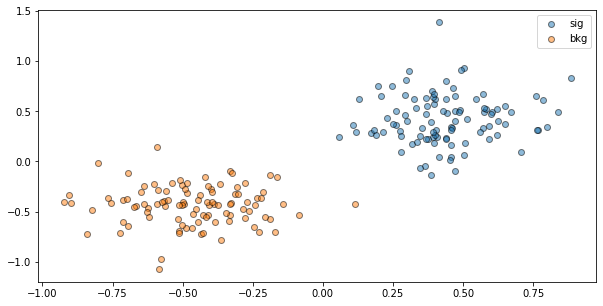

In [5]:
plot_scatter(sig,bkg,'x','y')

In [6]:
def train_svm(clf,sig,bkg):
    X = np.concatenate( [sig.values,bkg.values] )
    y = np.concatenate( [np.ones(len(sig.index)),np.zeros(len(bkg.index))] )

    clf.fit(X,y)

In [7]:
clf = svm.SVC(kernel='linear',C=1.0)

In [8]:
train_svm(clf,sig,bkg)

In [9]:
clf.predict([sig.values[0],bkg.values[0]])

array([1., 0.])

In [10]:
def evaluate_svm(clf,sig,bkg):
    X = np.concatenate( [sig.values,bkg.values] )
    y = np.concatenate( [np.ones(len(sig.index)),np.zeros(len(bkg.index))] )

    X0, X1 = X[:,0], X[:,1]
    x_min, x_max = X0.min() - 0.1, X0.max() + 0.1
    y_min, y_max = X1.min() - 0.1, X1.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                         np.arange(y_min, y_max, .01))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, colors=['tab:orange','tab:blue','tab:blue','tab:orange'], alpha=0.8)
    plot_scatter(sig,bkg,'x','y')
    return

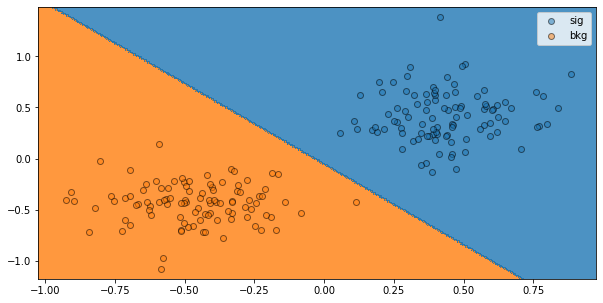

In [11]:
evaluate_svm(clf,sig,bkg)

What if the distributions are overlapping?

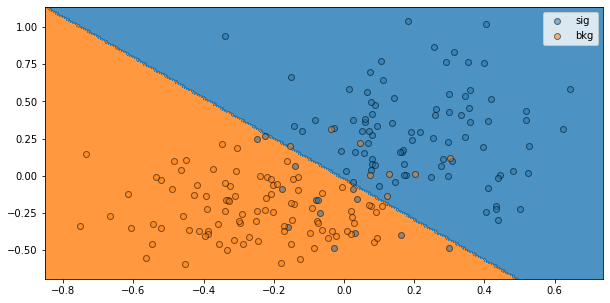

In [12]:
# Overlaps
mu_s = [0.2,0.2]
mu_b = [-0.2,-0.2]
sigma_s = [0.2, 0.3]
sigma_b = [0.2, 0.2]

sig = Datasets.gen_2Dgauss(mu_s,sigma_s,100)
bkg = Datasets.gen_2Dgauss(mu_b,sigma_b,100)

clf = svm.SVC(kernel='linear')
train_svm(clf,sig,bkg)
evaluate_svm(clf,sig,bkg)

In [13]:
# Now for something less trivial
def gen_spiral(a,s,r,w):
    x = a*(r*math.sin(r)+math.cos(r))+w
    y = a*(math.sin(r)-r*math.cos(r))-s+w
    return x, y
vspiral = np.vectorize(gen_spiral, excluded=['a','s'])

In [14]:
sig = pd.DataFrame()
bkg = pd.DataFrame()
sig_rand = np.random.uniform(0,10,1000)
bkg_rand = np.random.uniform(0,10,1000)
sig_wid = np.random.normal(0,0.05,1000)
bkg_wid = np.random.normal(0,0.05,1000)

sig['x'], sig['y'] = vspiral( a=0.2, s=0, r=sig_rand, w=sig_wid)
bkg['x'], bkg['y'] = vspiral( a=-0.2, s=0.2, r=bkg_rand, w=bkg_wid)

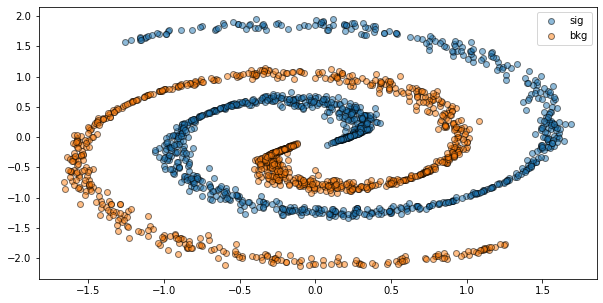

In [15]:
plot_scatter(sig,bkg,'x','y')

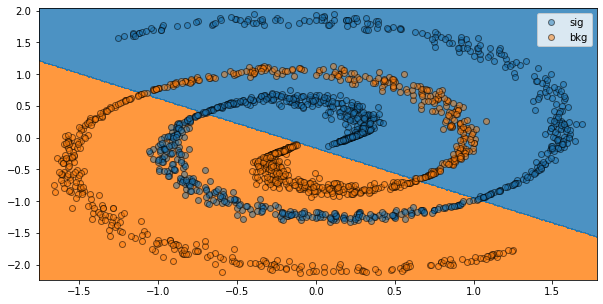

In [16]:
# Let's try the linear svm we used before
train_svm(clf,sig,bkg)
evaluate_svm(clf,sig,bkg)

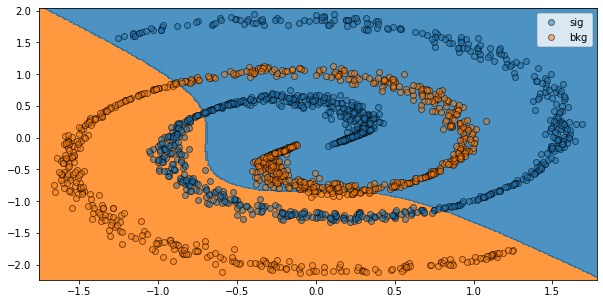

In [17]:
# Try a different kernel
clf = svm.SVC(kernel='poly',C=1.0,gamma='scale',degree=3,coef0=0.0)
train_svm(clf,sig,bkg)
evaluate_svm(clf,sig,bkg)

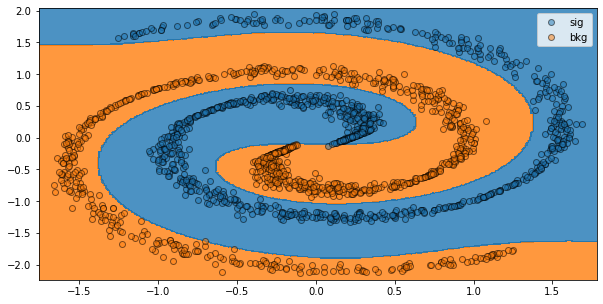

In [18]:
clf = svm.SVC(kernel='rbf',C=1.0,gamma='scale')
train_svm(clf,sig,bkg)
evaluate_svm(clf,sig,bkg)

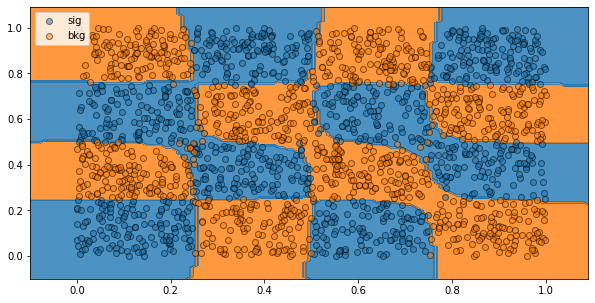

In [19]:
sig = Datasets.gen_chess('s',1000)
bkg = Datasets.gen_chess('b',1000)

clf = svm.SVC(kernel='rbf',gamma=20)
train_svm(clf,sig,bkg)
evaluate_svm(clf,sig,bkg)